In [1]:
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import MAS_library as MASL
import Pk_library as PKL

os.chdir('/home/mattho/git/ltu-cmass/matts_tests')
mpl.style.use('./style.mcstyle')

### Plot halo distribution

In [4]:
wdir = '/home/mattho/data/cmass-ili/abacus/nbody/L2000-N256'
lhids = np.arange(130, 181, dtype=int)

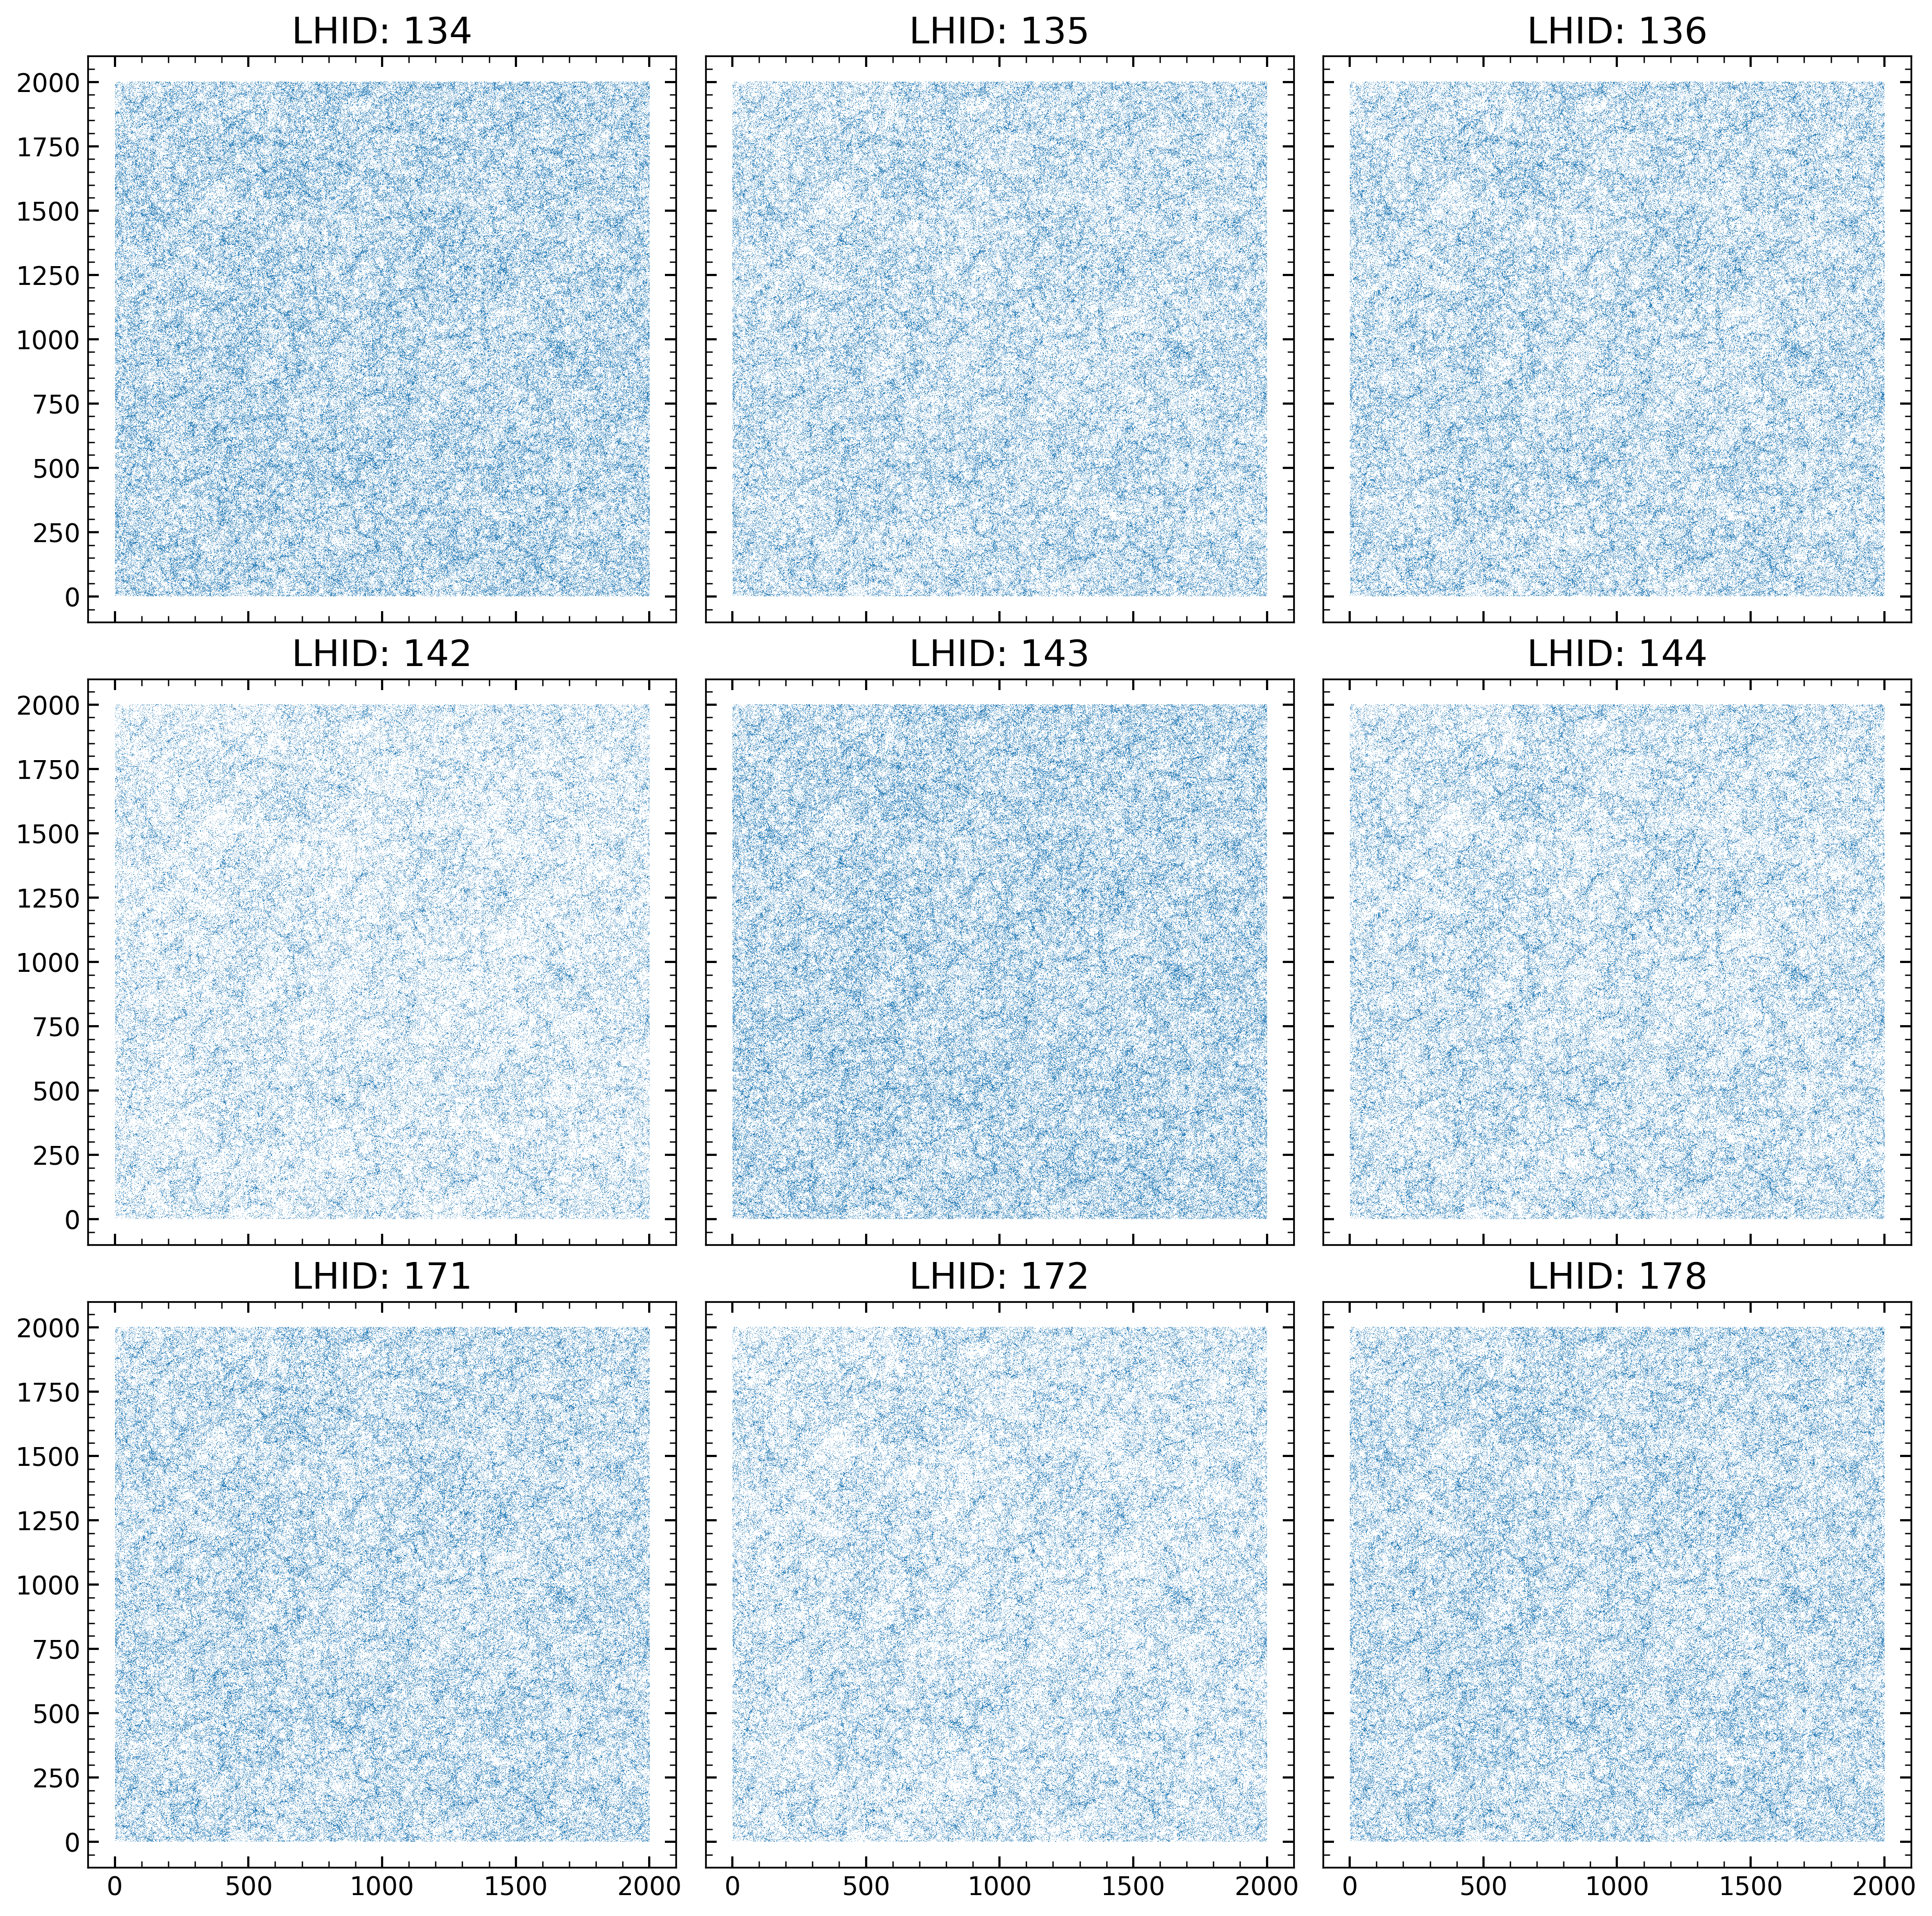

In [5]:
# Plot position distribution
N = 9
inds = np.random.choice(lhids, N, replace=False)
inds.sort()

def slice_mask(x, i, di, N=256, L=2000, axis=0):
    x_min, x_max = i*L/N, (i+di)*L/N
    return (x[:, axis] >= x_min) & (x[:, axis] < x_max)

M=3
f, axs = plt.subplots(N//M, M, figsize=(5*M, 5*(N//M)),
                      sharex=True, sharey=True,
                      gridspec_kw={'hspace': 0.1, 'wspace': 0.05},
                      dpi=300)
axs = axs.flatten()
for i, ax in enumerate(axs):
    ind = inds[i]
    hpos = np.load(join(wdir, str(ind), 'halo_pos.npy')) + 1000
    mask = slice_mask(hpos, 100, 20)
    _p = hpos[mask]
    ax.plot(_p[:, 1], _p[:, 2], ',', alpha=0.8)
    ax.set_title(f'LHID: {ind}')

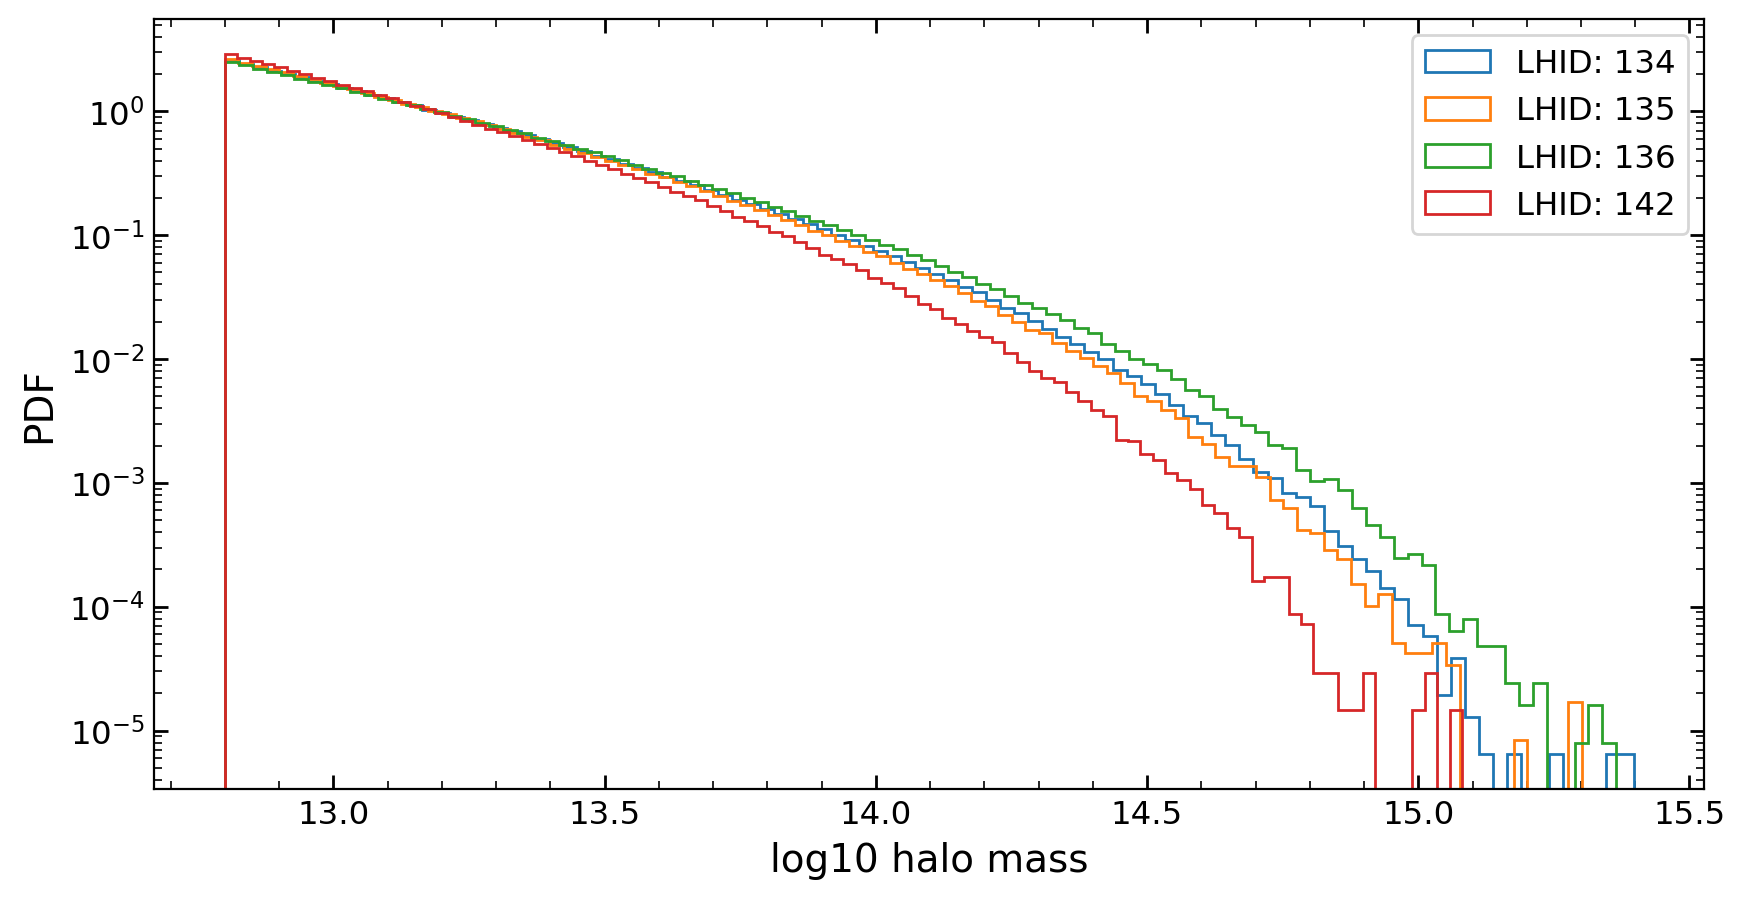

In [6]:
# plot mass distribution
f, ax = plt.subplots(1, 1, figsize=(10,5))
for i in inds[:N//2]:
    hmass = np.load(join(wdir, str(i), 'halo_mass.npy'))
    ax.hist(hmass, bins=100, histtype='step', label=f'LHID: {i}', density=True)
ax.semilogy()
ax.set(xlabel='log10 halo mass', ylabel='PDF')
ax.legend();

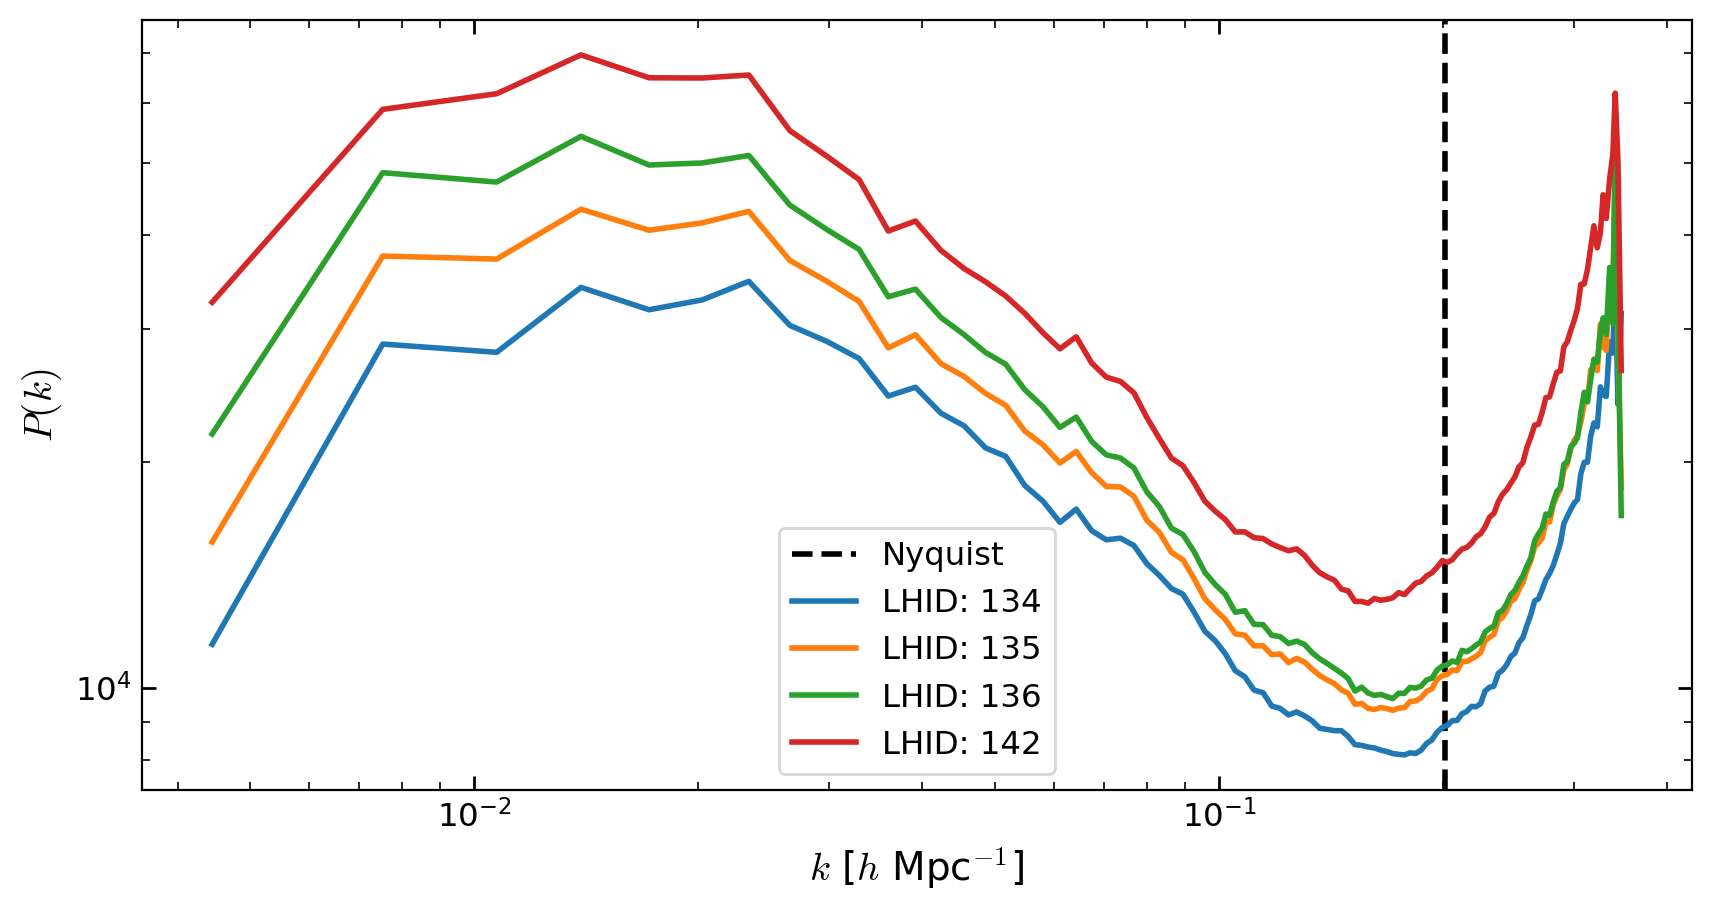

In [7]:
# plot halo P(k) distribution

Np = 128
nyq = np.pi*Np/2000

f, ax = plt.subplots(1, 1, figsize=(10,5))
ax.axvline(nyq, color='k', ls='--', label='Nyquist')
for i in inds[:N//2]:
    hpos = np.load(join(wdir, str(i), 'halo_pos.npy')) + 1000
    delta = np.zeros((Np, Np, Np), dtype=np.float32)
    MASL.MA(hpos, delta, BoxSize=2000, MAS='NGP', verbose=False)
    delta /= np.mean(delta)
    delta -= 1.0

    Pk = PKL.Pk(delta, BoxSize=2000, axis=0, MAS='NGP', threads=1, verbose=False)
    ax.plot(Pk.k3D, Pk.Pk[:,0], label=f'LHID: {i}')
ax.set(xlabel=r'$k$ [$h$ Mpc$^{-1}$]', ylabel=r'$P(k)$')
ax.loglog()
ax.legend();

### Port cosmologies

In [2]:
import pandas as pd

cosm = pd.read_csv(
    '/home/mattho/git/ltu-cmass/params/cosmologies.csv',
    skipinitialspace=True)
cosm.columns = [c.strip() for c in cosm.columns]
index = cosm['root'].apply(lambda x: int(x.strip()[-3:]))
index.name = 'index'
cosm.index = index
cosm

,root,notes,omega_b,omega_cdm,h,A_s,n_s,alpha_s,N_ur,N_ncdm,omega_ncdm,w0_fld,wa_fld,sigma8_m,sigma8_cb
index,,,,,,,,,,,,,,,
0,abacus_cosm000,"Baseline LCDM, Planck 2018 base_plikHM_TTTEEE_...",0.02237,0.1200,0.6736,2.083000e-09,0.9649,0.000,2.0328,1,0.00064420,-1.000,0.000,0.807952,0.811355
1,abacus_cosm001,"WMAP9+ACT+SPT LCDM, Calabrese++ 2017 ...",0.02242,0.1134,0.7030,2.037600e-09,0.9638,0.000,2.0328,1,0.00064420,-1.000,0.000,0.776779,0.780222
2,abacus_cosm002,"wCDM with thawing model w0 = -0.7, wa = -0.5 ...",0.02237,0.1200,0.6278,2.314000e-09,0.9649,0.000,2.0328,1,0.00064420,-0.700,-0.500,0.808189,0.811577
3,abacus_cosm003,"Neff=3.70, from base_nnu_plikHM_TT_lowl_lowE_R...",0.02260,0.1291,0.7160,2.243800e-09,0.9876,0.000,2.6868,1,0.00064420,-1.000,0.000,0.855190,0.858583
4,abacus_cosm004,"Low sigma8_matter = 0.75, otherwise Baseline L...",0.02237,0.1200,0.6736,1.794900e-09,0.9649,0.000,2.0328,1,0.00064420,-1.000,0.000,0.749999,0.753159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,abacus_cosm177,Emulator grid around baseline cosmology ...,0.02239,0.1344,0.6820,2.064100e-09,1.0002,0.007,2.8643,1,0.00064420,-0.757,-0.443,0.806026,0.809110
178,abacus_cosm178,Emulator grid around baseline cosmology ...,0.02234,0.1204,0.6542,1.966500e-09,0.9424,0.037,1.8987,1,0.00064420,-0.874,-0.455,0.791239,0.794555
179,abacus_cosm179,Emulator grid around baseline cosmology ...,0.02240,0.1067,0.5881,2.236500e-09,0.9308,-0.003,1.1884,1,0.00064420,-0.755,-0.435,0.775969,0.779541


In [3]:

Omega_m=cosm['omega_cdm'] + cosm['omega_b']
Omega_b=cosm['omega_b']
h=cosm['h']
n_s=cosm['n_s']
sigma8=cosm['sigma8_m']

out = np.zeros((max(index)+1, 5))
out[index, 0] = Omega_m
out[index, 1] = Omega_b
out[index, 2] = h
out[index, 3] = n_s
out[index, 4] = sigma8


In [4]:
# np.savetxt('/home/mattho/git/ltu-cmass/params/abacus_cosmologies.txt', 
#            out, delimiter=' ', fmt='%f')

### Port configs

In [5]:
suitepath = '/home/mattho/data/cmass-ili/abacus/nbody/L2000-N256'
lhids = np.arange(130, 181, dtype=int)

In [24]:
from omegaconf import OmegaConf
from cmass.nbody.tools import parse_nbody_config
from tqdm import tqdm
os.chdir('/home/mattho/git/ltu-cmass')

nbody = OmegaConf.load('/home/mattho/git/ltu-cmass/cmass/conf/nbody/abacus.yaml')
cfg = OmegaConf.load('/home/mattho/git/ltu-cmass/cmass/conf/global.yaml')
cfg = OmegaConf.masked_copy(cfg, ['meta'])
cfg['nbody'] = nbody
cfg['meta']['cosmofile'] = './params/abacus_cosmologies.txt'

for lhid in tqdm(lhids):
    cfg.nbody.lhid = int(lhid)
    cfg = parse_nbody_config(cfg)
    cfgpath = join(suitepath, str(lhid), 'config.yaml')
    with open(cfgpath, 'w') as f:
        OmegaConf.save(cfg, f)

  0%|          | 0/51 [00:00<?, ?it/s]

100%|██████████| 51/51 [00:00<00:00, 74.46it/s]
